In [ ]:
#!pip install ultralytics
from ultralytics import YOLO


image 1/1 /content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/valid/images/pooltrial_2_105.jpg: 640x640 1 cup, 258.5ms
Speed: 6.0ms preprocess, 258.5ms inference, 12.6ms postprocess per image at shape (1, 3, 640, 640)


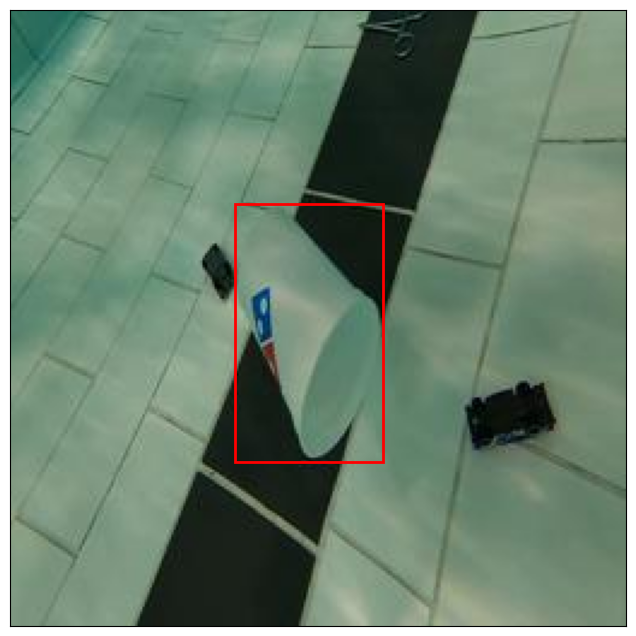

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the model and make the prediction
model = YOLO('/content/drive/MyDrive/4th_Semester/Capstone/weights/cou-cups.pt')
results = model("/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/valid/images/pooltrial_2_105.jpg")

prediction_result = results[0]
orig_img = prediction_result.orig_img
boxes = prediction_result.boxes

img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img_rgb)

for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

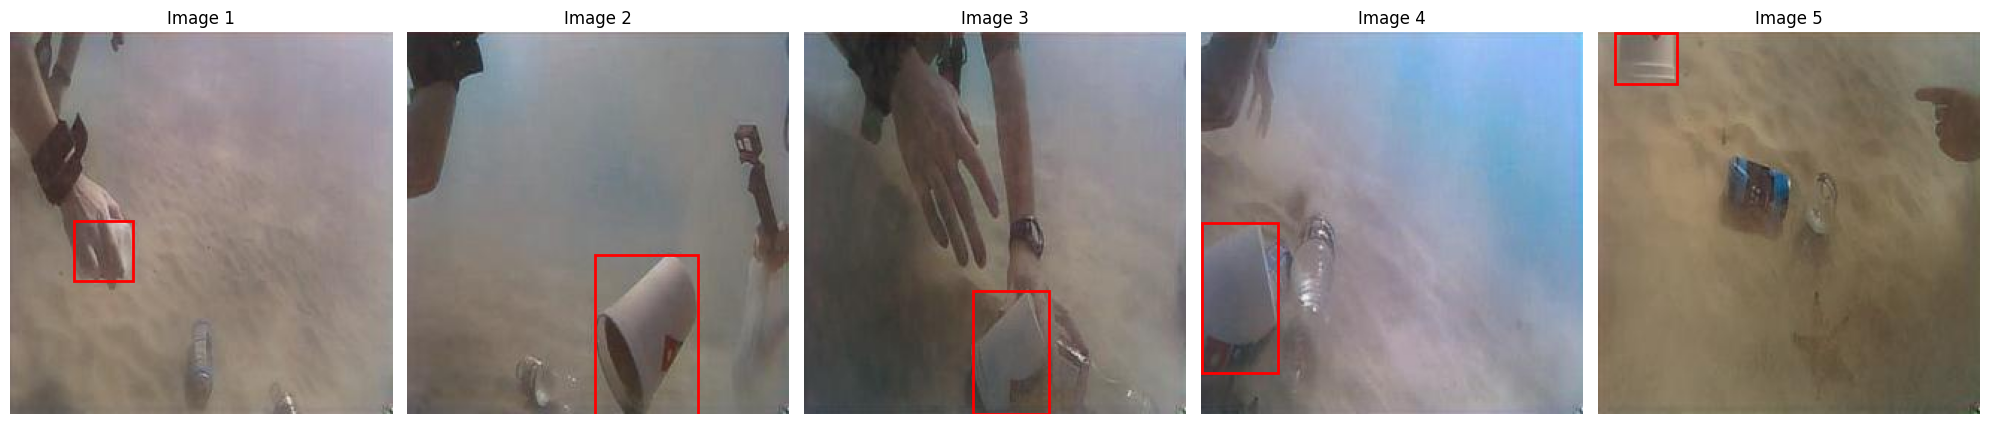

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

coco_root = '/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/'
annotations_dir = os.path.join(coco_root, 'labels')
img_dir = os.path.join(coco_root, 'images_enhanced')

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

image_files = [file for file in os.listdir(img_dir) if file.endswith(".jpg")][5:10]

for idx, img_filename in enumerate(image_files):
    img_path = os.path.join(img_dir, img_filename)
    image = Image.open(img_path).convert('RGB')
    img_width, img_height = image.size

    # Load the YOLO annotations
    annotation_filename = os.path.splitext(img_filename)[0] + ".txt"
    annotation_path = os.path.join(annotations_dir, annotation_filename)

    if not os.path.exists(annotation_path):
        continue

    with open(annotation_path, "r") as f:
        annotations = f.readlines()

    ax = axes[idx]
    ax.imshow(image)
    ax.set_title(f'Image {idx+1}')
    ax.axis('off')

    for annotation in annotations:
        label, x_center, y_center, width, height = map(float, annotation.strip().split())
        x = x_center - width / 2
        y = y_center - height / 2
        w = width * img_width
        h = height * img_height
        rect = patches.Rectangle((x * img_width, y * img_height), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.tight_layout()
plt.show()

In [ ]:
from pathlib import Path
from PIL import Image
import cv2
import torch
from tqdm import tqdm
from ultralytics import YOLO
import os

input_folder = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/images_resized"
output_folder = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/predictions_original"
#output_folder.mkdir(parents=True, exist_ok=True)

model = YOLO("/content/drive/MyDrive/4th_Semester/Capstone/cup/best_2.pt")

conf_threshold = 0.4

for image_path in tqdm(Path(input_folder).glob("*.jpg")):
    img = cv2.imread(str(image_path))

    results = model.predict(source=img, conf=conf_threshold, save=False)

    annotations = []
    for result in results:
        for box in result.boxes:
            cls = int(box.cls)
            x1, y1, x2, y2 = box.xyxy[0]
            w, h = img.shape[1], img.shape[0]
            x_center = (x1 + x2) / (2 * w)
            y_center = (y1 + y2) / (2 * h)
            width = (x2 - x1) / w
            height = (y2 - y1) / h
            conf = box.conf.item()
            annotations.append(f"{cls} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} {conf:.6f}\n")

    if annotations:
        output_annotation_file = os.path.join(output_folder, os.path.splitext(os.path.basename(image_path))[0] + ".txt")
        with open(output_annotation_file, "w") as f:
            f.writelines(annotations)

0it [00:00, ?it/s]


0: 640x640 1 cup, 145.8ms
Speed: 4.7ms preprocess, 145.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


1it [00:01,  1.55s/it]


0: 640x640 (no detections), 211.6ms
Speed: 5.6ms preprocess, 211.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


2it [00:02,  1.05it/s]


0: 640x640 (no detections), 181.1ms
Speed: 2.8ms preprocess, 181.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


3it [00:02,  1.12it/s]


0: 640x640 (no detections), 199.8ms
Speed: 2.9ms preprocess, 199.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


4it [00:03,  1.60it/s]


0: 640x640 (no detections), 192.5ms
Speed: 5.2ms preprocess, 192.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


5it [00:03,  2.09it/s]


0: 640x640 (no detections), 174.6ms
Speed: 4.0ms preprocess, 174.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


6it [00:03,  2.62it/s]


0: 640x640 1 cup, 191.7ms
Speed: 2.3ms preprocess, 191.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


7it [00:03,  3.05it/s]


0: 640x640 (no detections), 193.3ms
Speed: 4.1ms preprocess, 193.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


8it [00:03,  3.43it/s]


0: 640x640 (no detections), 176.6ms
Speed: 4.1ms preprocess, 176.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


9it [00:04,  3.81it/s]


0: 640x640 (no detections), 181.1ms
Speed: 5.4ms preprocess, 181.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


10it [00:04,  4.09it/s]


0: 640x640 (no detections), 185.0ms
Speed: 2.3ms preprocess, 185.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


11it [00:04,  4.31it/s]


0: 640x640 (no detections), 203.7ms
Speed: 4.0ms preprocess, 203.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


12it [00:04,  4.32it/s]


0: 640x640 (no detections), 203.2ms
Speed: 6.5ms preprocess, 203.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


13it [00:05,  4.34it/s]


0: 640x640 (no detections), 207.7ms
Speed: 2.7ms preprocess, 207.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


14it [00:05,  4.35it/s]


0: 640x640 (no detections), 191.9ms
Speed: 2.2ms preprocess, 191.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


15it [00:05,  4.43it/s]


0: 640x640 (no detections), 184.9ms
Speed: 2.3ms preprocess, 184.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


16it [00:05,  4.54it/s]


0: 640x640 1 cup, 146.7ms
Speed: 5.4ms preprocess, 146.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


17it [00:05,  4.85it/s]


0: 640x640 (no detections), 143.5ms
Speed: 2.2ms preprocess, 143.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


18it [00:06,  5.18it/s]


0: 640x640 4 cups, 146.5ms
Speed: 6.5ms preprocess, 146.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


19it [00:06,  5.31it/s]


0: 640x640 1 cup, 154.5ms
Speed: 2.2ms preprocess, 154.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


20it [00:06,  5.40it/s]


0: 640x640 (no detections), 147.5ms
Speed: 3.1ms preprocess, 147.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


21it [00:06,  5.56it/s]


0: 640x640 (no detections), 145.0ms
Speed: 2.1ms preprocess, 145.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


22it [00:06,  5.71it/s]


0: 640x640 (no detections), 142.6ms
Speed: 3.5ms preprocess, 142.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


23it [00:06,  5.83it/s]


0: 640x640 (no detections), 141.4ms
Speed: 3.0ms preprocess, 141.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


24it [00:07,  5.96it/s]


0: 640x640 (no detections), 144.1ms
Speed: 2.2ms preprocess, 144.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


25it [00:07,  5.99it/s]


0: 640x640 (no detections), 157.3ms
Speed: 4.8ms preprocess, 157.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


26it [00:07,  5.86it/s]


0: 640x640 (no detections), 138.3ms
Speed: 4.4ms preprocess, 138.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


27it [00:07,  5.99it/s]


0: 640x640 (no detections), 142.4ms
Speed: 3.6ms preprocess, 142.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


28it [00:07,  6.06it/s]


0: 640x640 (no detections), 142.5ms
Speed: 2.7ms preprocess, 142.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


29it [00:07,  6.05it/s]


0: 640x640 1 cup, 147.4ms
Speed: 2.6ms preprocess, 147.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


30it [00:08,  5.73it/s]


0: 640x640 (no detections), 152.7ms
Speed: 2.8ms preprocess, 152.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


31it [00:08,  5.74it/s]


0: 640x640 1 cup, 153.5ms
Speed: 3.4ms preprocess, 153.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


32it [00:08,  5.70it/s]


0: 640x640 1 cup, 148.5ms
Speed: 2.4ms preprocess, 148.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


33it [00:08,  5.72it/s]


0: 640x640 1 cup, 150.2ms
Speed: 3.9ms preprocess, 150.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


34it [00:08,  5.67it/s]


0: 640x640 (no detections), 147.0ms
Speed: 3.7ms preprocess, 147.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


35it [00:08,  5.74it/s]


0: 640x640 (no detections), 142.8ms
Speed: 4.2ms preprocess, 142.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


36it [00:09,  5.86it/s]


0: 640x640 1 cup, 144.6ms
Speed: 4.3ms preprocess, 144.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


37it [00:09,  5.87it/s]


0: 640x640 (no detections), 146.7ms
Speed: 2.2ms preprocess, 146.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


38it [00:09,  5.92it/s]


0: 640x640 1 cup, 145.8ms
Speed: 2.7ms preprocess, 145.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


39it [00:09,  5.88it/s]


0: 640x640 2 cups, 154.3ms
Speed: 3.0ms preprocess, 154.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


40it [00:09,  5.77it/s]


0: 640x640 1 cup, 149.8ms
Speed: 2.6ms preprocess, 149.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


41it [00:09,  5.74it/s]


0: 640x640 1 cup, 157.1ms
Speed: 4.7ms preprocess, 157.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


42it [00:10,  5.66it/s]


0: 640x640 (no detections), 145.3ms
Speed: 4.9ms preprocess, 145.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


43it [00:10,  5.78it/s]


0: 640x640 1 cup, 153.8ms
Speed: 2.3ms preprocess, 153.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


44it [00:10,  5.62it/s]


0: 640x640 (no detections), 148.3ms
Speed: 4.5ms preprocess, 148.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


45it [00:10,  5.69it/s]


0: 640x640 (no detections), 145.5ms
Speed: 5.2ms preprocess, 145.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


46it [00:10,  5.76it/s]


0: 640x640 (no detections), 148.1ms
Speed: 3.6ms preprocess, 148.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


47it [00:10,  5.80it/s]


0: 640x640 (no detections), 153.7ms
Speed: 4.1ms preprocess, 153.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


48it [00:11,  5.82it/s]


0: 640x640 (no detections), 137.6ms
Speed: 2.1ms preprocess, 137.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


49it [00:11,  5.98it/s]


0: 640x640 (no detections), 147.0ms
Speed: 2.3ms preprocess, 147.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


50it [00:11,  5.98it/s]


0: 640x640 (no detections), 153.4ms
Speed: 4.3ms preprocess, 153.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


51it [00:11,  5.88it/s]


0: 640x640 (no detections), 144.7ms
Speed: 4.5ms preprocess, 144.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


52it [00:11,  5.92it/s]


0: 640x640 (no detections), 144.5ms
Speed: 6.7ms preprocess, 144.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


53it [00:11,  5.97it/s]


0: 640x640 (no detections), 146.4ms
Speed: 2.2ms preprocess, 146.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


54it [00:12,  5.99it/s]


0: 640x640 1 cup, 148.7ms
Speed: 4.8ms preprocess, 148.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


55it [00:12,  5.89it/s]


0: 640x640 (no detections), 155.6ms
Speed: 8.2ms preprocess, 155.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


56it [00:12,  5.80it/s]


0: 640x640 (no detections), 149.8ms
Speed: 4.9ms preprocess, 149.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


57it [00:12,  5.83it/s]


0: 640x640 (no detections), 143.9ms
Speed: 3.9ms preprocess, 143.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


58it [00:12,  5.90it/s]


0: 640x640 (no detections), 136.5ms
Speed: 2.2ms preprocess, 136.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


59it [00:13,  6.04it/s]


0: 640x640 (no detections), 138.2ms
Speed: 4.6ms preprocess, 138.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


60it [00:13,  6.13it/s]


0: 640x640 (no detections), 147.2ms
Speed: 4.3ms preprocess, 147.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


61it [00:13,  6.03it/s]


0: 640x640 1 cup, 156.9ms
Speed: 2.4ms preprocess, 156.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


62it [00:13,  5.86it/s]


0: 640x640 (no detections), 147.9ms
Speed: 4.6ms preprocess, 147.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


63it [00:13,  5.88it/s]


0: 640x640 1 cup, 156.1ms
Speed: 4.7ms preprocess, 156.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


64it [00:13,  5.70it/s]


0: 640x640 (no detections), 156.5ms
Speed: 4.0ms preprocess, 156.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


65it [00:14,  5.69it/s]


0: 640x640 1 cup, 144.2ms
Speed: 3.8ms preprocess, 144.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


66it [00:14,  5.70it/s]


0: 640x640 1 cup, 147.0ms
Speed: 5.1ms preprocess, 147.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


67it [00:14,  5.53it/s]


0: 640x640 (no detections), 143.6ms
Speed: 5.5ms preprocess, 143.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


68it [00:14,  5.67it/s]


0: 640x640 1 cup, 149.0ms
Speed: 4.5ms preprocess, 149.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


69it [00:14,  5.66it/s]


0: 640x640 (no detections), 146.5ms
Speed: 5.6ms preprocess, 146.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


70it [00:14,  5.73it/s]


0: 640x640 1 cup, 150.1ms
Speed: 1.8ms preprocess, 150.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


71it [00:15,  5.71it/s]


0: 640x640 (no detections), 142.9ms
Speed: 4.2ms preprocess, 142.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


72it [00:15,  5.83it/s]


0: 640x640 2 cups, 152.6ms
Speed: 5.4ms preprocess, 152.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


73it [00:15,  5.75it/s]


0: 640x640 2 cups, 150.1ms
Speed: 4.6ms preprocess, 150.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


74it [00:15,  5.72it/s]


0: 640x640 (no detections), 189.1ms
Speed: 5.4ms preprocess, 189.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


75it [00:15,  5.35it/s]


0: 640x640 (no detections), 192.2ms
Speed: 2.1ms preprocess, 192.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


76it [00:16,  5.10it/s]


0: 640x640 (no detections), 178.1ms
Speed: 3.7ms preprocess, 178.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


77it [00:16,  5.00it/s]


0: 640x640 (no detections), 209.1ms
Speed: 4.0ms preprocess, 209.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


78it [00:16,  4.76it/s]


0: 640x640 (no detections), 214.4ms
Speed: 8.0ms preprocess, 214.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


79it [00:16,  4.53it/s]


0: 640x640 (no detections), 176.4ms
Speed: 2.3ms preprocess, 176.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


80it [00:16,  4.68it/s]


0: 640x640 (no detections), 191.3ms
Speed: 2.3ms preprocess, 191.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


81it [00:17,  4.66it/s]


0: 640x640 (no detections), 196.0ms
Speed: 2.4ms preprocess, 196.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


82it [00:17,  4.59it/s]


0: 640x640 (no detections), 210.8ms
Speed: 6.6ms preprocess, 210.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


83it [00:17,  4.46it/s]


0: 640x640 (no detections), 211.1ms
Speed: 4.3ms preprocess, 211.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


84it [00:17,  4.40it/s]


0: 640x640 1 cup, 202.1ms
Speed: 3.9ms preprocess, 202.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


85it [00:18,  4.37it/s]


0: 640x640 (no detections), 147.3ms
Speed: 2.4ms preprocess, 147.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


86it [00:18,  4.77it/s]


0: 640x640 (no detections), 150.5ms
Speed: 5.4ms preprocess, 150.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


87it [00:18,  5.00it/s]


0: 640x640 1 cup, 156.7ms
Speed: 4.9ms preprocess, 156.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


88it [00:18,  4.94it/s]


0: 640x640 (no detections), 147.0ms
Speed: 4.5ms preprocess, 147.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


89it [00:18,  5.15it/s]


0: 640x640 (no detections), 145.4ms
Speed: 4.1ms preprocess, 145.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


90it [00:18,  5.38it/s]


0: 640x640 (no detections), 156.7ms
Speed: 7.6ms preprocess, 156.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


91it [00:19,  5.41it/s]


0: 640x640 (no detections), 145.2ms
Speed: 4.9ms preprocess, 145.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


92it [00:19,  5.58it/s]


0: 640x640 (no detections), 142.1ms
Speed: 4.5ms preprocess, 142.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


93it [00:19,  5.74it/s]


0: 640x640 (no detections), 154.4ms
Speed: 2.1ms preprocess, 154.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


94it [00:19,  5.72it/s]


0: 640x640 (no detections), 147.9ms
Speed: 4.1ms preprocess, 147.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


95it [00:19,  5.73it/s]


0: 640x640 1 cup, 148.4ms
Speed: 4.4ms preprocess, 148.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


96it [00:20,  5.70it/s]


0: 640x640 (no detections), 147.4ms
Speed: 4.9ms preprocess, 147.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


97it [00:20,  5.74it/s]


0: 640x640 1 cup, 148.1ms
Speed: 4.3ms preprocess, 148.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


98it [00:20,  5.72it/s]


0: 640x640 (no detections), 143.8ms
Speed: 4.6ms preprocess, 143.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


99it [00:20,  5.80it/s]


0: 640x640 (no detections), 148.1ms
Speed: 6.0ms preprocess, 148.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


100it [00:20,  5.81it/s]


0: 640x640 (no detections), 140.9ms
Speed: 2.4ms preprocess, 140.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


101it [00:20,  5.96it/s]


0: 640x640 (no detections), 145.9ms
Speed: 2.9ms preprocess, 145.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


102it [00:21,  5.93it/s]


0: 640x640 (no detections), 152.2ms
Speed: 4.4ms preprocess, 152.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


103it [00:21,  5.84it/s]


0: 640x640 1 cup, 140.6ms
Speed: 5.1ms preprocess, 140.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


104it [00:21,  5.85it/s]


0: 640x640 (no detections), 143.3ms
Speed: 4.6ms preprocess, 143.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


105it [00:21,  5.93it/s]


0: 640x640 (no detections), 159.7ms
Speed: 2.2ms preprocess, 159.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


106it [00:21,  5.81it/s]


0: 640x640 (no detections), 143.4ms
Speed: 2.2ms preprocess, 143.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


107it [00:21,  5.92it/s]


0: 640x640 (no detections), 146.2ms
Speed: 5.6ms preprocess, 146.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


108it [00:22,  5.92it/s]


0: 640x640 1 cup, 143.8ms
Speed: 3.3ms preprocess, 143.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


109it [00:22,  5.87it/s]


0: 640x640 1 cup, 143.9ms
Speed: 5.2ms preprocess, 143.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


110it [00:22,  5.61it/s]


0: 640x640 (no detections), 149.4ms
Speed: 5.2ms preprocess, 149.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


111it [00:22,  5.64it/s]


0: 640x640 (no detections), 160.1ms
Speed: 2.0ms preprocess, 160.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


112it [00:22,  5.64it/s]


0: 640x640 1 cup, 148.2ms
Speed: 3.4ms preprocess, 148.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


113it [00:22,  5.64it/s]


0: 640x640 (no detections), 148.9ms
Speed: 3.1ms preprocess, 148.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


114it [00:23,  5.73it/s]


0: 640x640 (no detections), 148.3ms
Speed: 3.8ms preprocess, 148.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


115it [00:23,  5.77it/s]


0: 640x640 1 cup, 146.9ms
Speed: 2.9ms preprocess, 146.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


116it [00:23,  5.77it/s]


0: 640x640 1 cup, 145.5ms
Speed: 1.9ms preprocess, 145.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


117it [00:23,  5.76it/s]


0: 640x640 1 cup, 149.3ms
Speed: 2.4ms preprocess, 149.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


118it [00:23,  5.73it/s]


0: 640x640 (no detections), 139.4ms
Speed: 3.3ms preprocess, 139.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


119it [00:23,  5.87it/s]


0: 640x640 (no detections), 168.9ms
Speed: 4.9ms preprocess, 168.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


120it [00:24,  5.68it/s]


0: 640x640 1 cup, 143.5ms
Speed: 3.5ms preprocess, 143.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


121it [00:24,  5.72it/s]


0: 640x640 (no detections), 150.8ms
Speed: 4.0ms preprocess, 150.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


122it [00:24,  5.73it/s]


0: 640x640 (no detections), 152.9ms
Speed: 3.9ms preprocess, 152.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


123it [00:24,  5.72it/s]


0: 640x640 (no detections), 135.2ms
Speed: 2.5ms preprocess, 135.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


124it [00:24,  5.86it/s]


0: 640x640 (no detections), 143.7ms
Speed: 2.1ms preprocess, 143.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


125it [00:25,  5.94it/s]


0: 640x640 (no detections), 146.2ms
Speed: 5.9ms preprocess, 146.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


126it [00:25,  5.96it/s]


0: 640x640 1 cup, 142.7ms
Speed: 2.3ms preprocess, 142.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


127it [00:25,  5.86it/s]


0: 640x640 (no detections), 145.7ms
Speed: 4.1ms preprocess, 145.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


128it [00:25,  5.90it/s]


0: 640x640 (no detections), 150.2ms
Speed: 4.3ms preprocess, 150.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


129it [00:25,  5.88it/s]


0: 640x640 (no detections), 158.1ms
Speed: 2.2ms preprocess, 158.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


130it [00:25,  5.84it/s]


0: 640x640 (no detections), 152.2ms
Speed: 2.5ms preprocess, 152.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


131it [00:26,  5.75it/s]


0: 640x640 (no detections), 153.4ms
Speed: 2.5ms preprocess, 153.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


132it [00:26,  5.53it/s]


0: 640x640 1 cup, 146.6ms
Speed: 4.1ms preprocess, 146.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


133it [00:26,  5.55it/s]


0: 640x640 (no detections), 158.1ms
Speed: 3.8ms preprocess, 158.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


134it [00:26,  5.57it/s]


0: 640x640 1 cup, 157.8ms
Speed: 2.6ms preprocess, 157.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


135it [00:26,  5.48it/s]


0: 640x640 (no detections), 154.4ms
Speed: 2.2ms preprocess, 154.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


136it [00:26,  5.55it/s]


0: 640x640 (no detections), 157.1ms
Speed: 5.0ms preprocess, 157.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


137it [00:27,  5.54it/s]


0: 640x640 1 cup, 152.4ms
Speed: 4.4ms preprocess, 152.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


138it [00:27,  5.54it/s]


0: 640x640 (no detections), 144.7ms
Speed: 5.4ms preprocess, 144.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


139it [00:27,  5.67it/s]


0: 640x640 (no detections), 144.1ms
Speed: 4.0ms preprocess, 144.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


140it [00:27,  5.74it/s]


0: 640x640 1 cup, 158.5ms
Speed: 3.8ms preprocess, 158.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


141it [00:27,  5.61it/s]


0: 640x640 (no detections), 146.7ms
Speed: 4.8ms preprocess, 146.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


142it [00:28,  5.73it/s]


0: 640x640 1 cup, 188.8ms
Speed: 2.1ms preprocess, 188.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


143it [00:28,  5.31it/s]


0: 640x640 (no detections), 177.1ms
Speed: 2.5ms preprocess, 177.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


144it [00:28,  5.21it/s]


0: 640x640 (no detections), 178.8ms
Speed: 3.6ms preprocess, 178.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


145it [00:28,  5.10it/s]


0: 640x640 (no detections), 204.9ms
Speed: 4.4ms preprocess, 204.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


146it [00:28,  4.79it/s]


0: 640x640 (no detections), 205.3ms
Speed: 4.7ms preprocess, 205.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


147it [00:29,  4.62it/s]


0: 640x640 1 cup, 188.7ms
Speed: 4.0ms preprocess, 188.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


148it [00:29,  4.56it/s]


0: 640x640 (no detections), 178.9ms
Speed: 3.9ms preprocess, 178.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


149it [00:29,  4.65it/s]


0: 640x640 (no detections), 207.0ms
Speed: 2.2ms preprocess, 207.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


150it [00:29,  4.56it/s]


0: 640x640 (no detections), 216.5ms
Speed: 2.4ms preprocess, 216.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


151it [00:30,  4.36it/s]


0: 640x640 (no detections), 208.1ms
Speed: 4.0ms preprocess, 208.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


152it [00:30,  4.22it/s]


0: 640x640 1 cup, 195.0ms
Speed: 2.1ms preprocess, 195.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


153it [00:30,  4.28it/s]


0: 640x640 (no detections), 149.3ms
Speed: 4.1ms preprocess, 149.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


154it [00:30,  4.63it/s]


0: 640x640 1 cup, 148.3ms
Speed: 2.3ms preprocess, 148.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


155it [00:30,  4.86it/s]


0: 640x640 (no detections), 137.7ms
Speed: 2.3ms preprocess, 137.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


156it [00:31,  5.22it/s]


0: 640x640 1 cup, 140.1ms
Speed: 2.1ms preprocess, 140.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


157it [00:31,  5.42it/s]


0: 640x640 1 cup, 154.3ms
Speed: 2.3ms preprocess, 154.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


158it [00:31,  5.45it/s]


0: 640x640 (no detections), 142.7ms
Speed: 7.6ms preprocess, 142.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


159it [00:31,  5.60it/s]


0: 640x640 (no detections), 154.2ms
Speed: 4.9ms preprocess, 154.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


160it [00:31,  5.62it/s]


0: 640x640 (no detections), 155.8ms
Speed: 3.9ms preprocess, 155.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


161it [00:31,  5.60it/s]


0: 640x640 1 cup, 152.9ms
Speed: 4.9ms preprocess, 152.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


162it [00:32,  5.53it/s]


0: 640x640 (no detections), 139.2ms
Speed: 3.1ms preprocess, 139.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


163it [00:32,  5.76it/s]


0: 640x640 (no detections), 135.3ms
Speed: 4.2ms preprocess, 135.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


164it [00:32,  5.96it/s]


0: 640x640 1 cup, 140.0ms
Speed: 3.6ms preprocess, 140.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


165it [00:32,  5.91it/s]


0: 640x640 1 cup, 150.9ms
Speed: 5.0ms preprocess, 150.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


166it [00:32,  5.78it/s]


0: 640x640 1 cup, 145.4ms
Speed: 6.2ms preprocess, 145.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


167it [00:32,  5.70it/s]


0: 640x640 (no detections), 142.8ms
Speed: 2.4ms preprocess, 142.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


168it [00:33,  5.64it/s]


0: 640x640 (no detections), 137.5ms
Speed: 2.5ms preprocess, 137.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


169it [00:33,  5.84it/s]


0: 640x640 1 cup, 142.3ms
Speed: 2.6ms preprocess, 142.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


170it [00:33,  5.85it/s]


0: 640x640 1 cup, 136.8ms
Speed: 2.5ms preprocess, 136.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


171it [00:33,  5.93it/s]


0: 640x640 (no detections), 135.7ms
Speed: 4.1ms preprocess, 135.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


172it [00:33,  6.04it/s]


0: 640x640 (no detections), 143.3ms
Speed: 2.3ms preprocess, 143.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


173it [00:33,  6.10it/s]


0: 640x640 2 cups, 148.1ms
Speed: 2.7ms preprocess, 148.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


174it [00:34,  5.94it/s]


0: 640x640 (no detections), 145.5ms
Speed: 5.0ms preprocess, 145.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


175it [00:34,  5.90it/s]


0: 640x640 1 cup, 145.2ms
Speed: 5.6ms preprocess, 145.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


176it [00:34,  5.80it/s]


0: 640x640 (no detections), 145.8ms
Speed: 4.2ms preprocess, 145.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


177it [00:34,  5.84it/s]


0: 640x640 (no detections), 146.7ms
Speed: 6.2ms preprocess, 146.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


178it [00:34,  5.85it/s]


0: 640x640 (no detections), 145.9ms
Speed: 2.3ms preprocess, 145.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


179it [00:34,  5.82it/s]


0: 640x640 1 cup, 153.7ms
Speed: 4.0ms preprocess, 153.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


180it [00:35,  5.71it/s]


0: 640x640 (no detections), 147.9ms
Speed: 3.1ms preprocess, 147.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


181it [00:35,  5.74it/s]


0: 640x640 1 cup, 147.8ms
Speed: 2.6ms preprocess, 147.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


182it [00:35,  5.71it/s]


0: 640x640 (no detections), 150.0ms
Speed: 4.9ms preprocess, 150.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


183it [00:35,  5.76it/s]


0: 640x640 (no detections), 146.5ms
Speed: 3.9ms preprocess, 146.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


184it [00:35,  5.83it/s]


0: 640x640 (no detections), 150.7ms
Speed: 4.6ms preprocess, 150.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


185it [00:36,  5.72it/s]


0: 640x640 (no detections), 146.5ms
Speed: 4.8ms preprocess, 146.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


186it [00:36,  5.74it/s]


0: 640x640 (no detections), 142.7ms
Speed: 4.0ms preprocess, 142.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


187it [00:36,  5.85it/s]


0: 640x640 1 cup, 136.6ms
Speed: 2.5ms preprocess, 136.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


188it [00:36,  5.77it/s]


0: 640x640 (no detections), 138.8ms
Speed: 2.4ms preprocess, 138.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


189it [00:36,  5.92it/s]


0: 640x640 (no detections), 133.8ms
Speed: 2.0ms preprocess, 133.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


190it [00:36,  6.08it/s]


0: 640x640 (no detections), 147.7ms
Speed: 2.2ms preprocess, 147.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


191it [00:37,  6.06it/s]


0: 640x640 (no detections), 150.1ms
Speed: 2.2ms preprocess, 150.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


192it [00:37,  5.98it/s]


0: 640x640 (no detections), 144.0ms
Speed: 2.2ms preprocess, 144.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


193it [00:37,  5.99it/s]


0: 640x640 (no detections), 147.6ms
Speed: 4.3ms preprocess, 147.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


194it [00:37,  5.17it/s]


In [ ]:
# Count the number of files
import os

folder_path = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/test/predicted"

files_list = os.listdir(folder_path)
num_files = len(files_list)
print(f"Number of files in the folder: {num_files}")


Number of files in the folder: 287


In [ ]:
import os
import csv
from collections import defaultdict

def calculate_iou(box1, box2):
    x_center1, y_center1, width1, height1 = box1
    x_center2, y_center2, width2, height2 = box2

    x_min1 = x_center1 - width1 / 2
    y_min1 = y_center1 - height1 / 2
    x_max1 = x_center1 + width1 / 2
    y_max1 = y_center1 + height1 / 2

    x_min2 = x_center2 - width2 / 2
    y_min2 = y_center2 - height2 / 2
    x_max2 = x_center2 + width2 / 2
    y_max2 = y_center2 + height2 / 2

    x_left = max(x_min1, x_min2)
    y_top = max(y_min1, y_min2)
    x_right = min(x_max1, x_max2)
    y_bottom = min(y_max1, y_max2)

    intersection_area = max(0, x_right - x_left) * max(0, y_bottom - y_top)

    box1_area = width1 * height1
    box2_area = width2 * height2

    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0

    return iou


ground_truth_dir = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/labels"
predicted_dir = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/predictions_original"
predicted_dir_en = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/predictions_enhanced"

output_csv = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/iou.csv"

iou_dict = defaultdict(list)

for gt_filename in os.listdir(ground_truth_dir):
    with open(os.path.join(ground_truth_dir, gt_filename), 'r') as gt_file:
        gt_boxes = [list(map(float, line.strip().split())) for line in gt_file.readlines()]

    pred_file_path = os.path.join(predicted_dir, gt_filename)

    if os.path.isfile(pred_file_path):
        with open(pred_file_path, 'r') as pred_file:
            pred_boxes = [list(map(float, line.strip().split())) for line in pred_file.readlines()]

        for gt_box in gt_boxes:
            max_iou = 0
            for pred_box in pred_boxes:
                iou = calculate_iou(gt_box[1:], pred_box[1:-1])
                max_iou = max(max_iou, iou)
            iou_dict[gt_filename].append(max_iou)
    else:
        iou_dict[gt_filename].append(0)

    pred_en_file_path = os.path.join(predicted_dir_en, gt_filename)

    if os.path.isfile(pred_en_file_path):
        with open(pred_en_file_path, 'r') as pred_file_en:
            pred_boxes_en = [list(map(float, line.strip().split())) for line in pred_file_en.readlines()]

        for gt_box in gt_boxes:
            max_iou = 0
            for pred_box_en in pred_boxes_en:
                iou = calculate_iou(gt_box[1:], pred_box_en[1:-1])
                max_iou = max(max_iou, iou)
            iou_dict[gt_filename].append(max_iou)
    else:
        iou_dict[gt_filename].append(0)

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Filename', 'IoU_original', 'IoU_enhanced'])
    for filename, ious in iou_dict.items():
            writer.writerow([filename, ious[0], ious[1]])


In [ ]:
import csv

csv_file = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/ocean-cups/iou.csv"

count = 0

with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        iou_original = float(row['IoU_original'])
        iou_enhanced = float(row['IoU_enhanced'])

        if iou_enhanced > iou_original * 1.1:
            count += 1

print("Number of entries where IoU_enhanced is 0% more than IoU_original:", count)


total_iou_original = 0
total_iou_enhanced = 0
count_non_zero_o = 0
count_non_zero_e = 0

with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        iou_original = float(row['IoU_original'])
        iou_enhanced = float(row['IoU_enhanced'])

        if iou_original != 0:
            total_iou_original += iou_original
            count_non_zero_o += 1
        if iou_enhanced != 0:
            total_iou_enhanced += iou_enhanced
            count_non_zero_e += 1

average_iou_original = total_iou_original / count_non_zero_o
average_iou_enhanced = total_iou_enhanced / count_non_zero_e

print("Average IoU_original (non-zero elements only):", average_iou_original)
print("Average IoU_enhanced (non-zero elements only):", average_iou_enhanced)


Number of entries where IoU_enhanced is 0% more than IoU_original: 30
Average IoU_original (non-zero elements only): 0.7085276936472216
Average IoU_enhanced (non-zero elements only): 0.6157496210536647


In [ ]:
import os
import csv
from collections import defaultdict

ground_truth_dir = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/test/labels"
predicted_dir = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/test/predicted"
predicted_dir_en = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/test/predicted_enhanced"

output_csv = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/test/confidence_scores.csv"

confidence_scores_dict = defaultdict(list)

for gt_filename in os.listdir(ground_truth_dir):
    filename = os.path.splitext(gt_filename)[0]

    max_confidence_score = 0
    pred_file_path = os.path.join(predicted_dir, gt_filename)
    if os.path.isfile(pred_file_path):
        with open(pred_file_path, 'r') as pred_file:
            for line in pred_file:
                confidence_score = float(line.strip().split()[-1])

                max_confidence_score = max(max_confidence_score, confidence_score)

    confidence_scores_dict[filename].append(max_confidence_score)

    max_confidence_score = 0
    pred_en_file_path = os.path.join(predicted_dir_en, gt_filename)
    if os.path.isfile(pred_en_file_path):

        with open(pred_en_file_path, 'r') as pred_en_file:
            for line in pred_en_file:
                confidence_score = float(line.strip().split()[-1])
                max_confidence_score = max(max_confidence_score, confidence_score)

    confidence_scores_dict[filename].append(max_confidence_score)

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Filename', 'Confidence_score_original', 'Confidence_score_enhanced'])
    for filename, confidence_scores in confidence_scores_dict.items():
        writer.writerow([filename] + confidence_scores)


In [ ]:
import csv

csv_file = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/test/confidence_scores.csv"

total_original_confidence = 0
total_enhanced_confidence = 0
count_non_zero_o = 0
count_non_zero_e = 0
count_enhanced_more_than_original = 0

with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        confidence_original = float(row['Confidence_score_original'])
        confidence_enhanced = float(row['Confidence_score_enhanced'])

        if confidence_original != 0:
            total_original_confidence += confidence_original
            count_non_zero_o += 1
        if confidence_enhanced != 0:
            total_enhanced_confidence += confidence_enhanced
            count_non_zero_e += 1

        if confidence_enhanced > 1.05 * confidence_original:
            count_enhanced_more_than_original += 1

average_original_confidence = total_original_confidence / count_non_zero_o
average_enhanced_confidence = total_enhanced_confidence / count_non_zero_e
print("Average Confidence Score (Original):", average_original_confidence)
print("Average Confidence Score (Enhanced):", average_enhanced_confidence)
print("Number of Cases where Enhanced Confidence is 5% More than Original:", count_enhanced_more_than_original)


Average Confidence Score (Original): 0.7195988710801396
Average Confidence Score (Enhanced): 0.7118373870967741
Number of Cases where Enhanced Confidence is 5% More than Original: 38


In [ ]:
#save visualized predictions in a folder
import cv2
from PIL import Image
from torchvision.transforms.functional import to_pil_image
import os

model = YOLO('/content/drive/MyDrive/4th_Semester/Capstone/cup/best_2.pt')

input_folder = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/valid/images"
output_folder = "/content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/valid/predictions"

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)

        results = model(image_path)
        prediction_result = results[0]
        boxes = prediction_result.boxes

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img)


WARNING ⚠️ /content/drive/MyDrive/4th_Semester/Capstone/cup/best_2.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.5s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/drive/MyDrive/4th_Semester/Capstone/cup/cup_data/Resized_Data/valid/images/pooltrial_2_741.jpg: 640x640 1 cup, 417.6ms
Speed: 24.2ms preprocess, 417.6ms inference, 29.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/4th_Semester/Capston